In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import DatasetFolder
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import PIL
import os
import numpy as np
from tqdm.notebook import tqdm

# Data

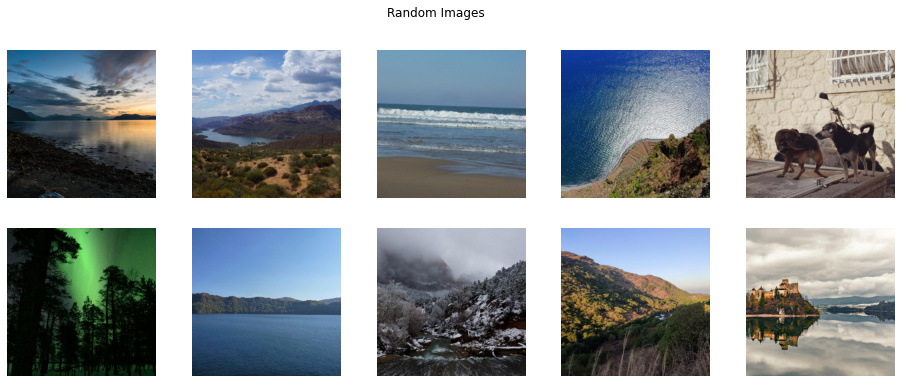

In [74]:
N_IMAGES = 10

random_images = np.random.permutation(os.listdir('images'))[:N_IMAGES]
ncols = 5
nrows = N_IMAGES // ncols
fig = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 3*nrows))

plt.suptitle('Random Images')

for i, img in enumerate(random_images):
    plt.subplot(nrows, ncols, i+1)
    image = PIL.Image.open('./images/' + img)
    plt.imshow(image)
    plt.axis('off')
    
plt.show()

# DCGAN - Deep Convolutional Generative Adversial Network

[<img src="./doc/dcgan_generator.png" width="500"/>](image.png)


In [63]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [66]:
class Generator(nn.Module):   
    
    def __init__(self):
        super().__init__()
        self.gen = nn.Sequential(
            # Input Latent Vector
            nn.ConvTranspose2d(in_channels=1, out_channels=1024, 
                               kernel_size=(4, 4), stride=1, padding=0, bias=False),
            nn.BatchNorm2d(num_features=1024),
            nn.ReLU(inplace=True),
            # output Size = 7
            nn.ConvTranspose2d(in_channels=1024, out_channels=512, 
                               kernel_size=(4, 4), stride=2, padding=0, bias=False),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True),
            # output Size = 16
            nn.ConvTranspose2d(in_channels=512, out_channels=256, 
                               kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True),
            # output Size = 32
            nn.ConvTranspose2d(in_channels=256, out_channels=128, 
                               kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(inplace=True),
            # output Size = 64
            nn.ConvTranspose2d(in_channels=128, out_channels=64, 
                               kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(inplace=True),
            # output Size = 128
            nn.ConvTranspose2d(in_channels=64, out_channels=32, 
                               kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(inplace=True),
            # output Size = 256
            nn.ConvTranspose2d(in_channels=32, out_channels=16, 
                               kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(num_features=16),
            nn.ReLU(inplace=True),
            # output Size = 512
            nn.ConvTranspose2d(in_channels=16, out_channels=3, 
                               kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.Tanh(),
            # Out = 1024
        )

    def forward(self, X):
        return self.gen(X)
    
class Discriminator(nn.Module):
    
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(3, , 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)
        

In [16]:
def calc_layer_dim(strides, input_size, kernel_size, padding):
    return strides * (input_size-1) + kernel_size - 2*padding

In [ ]:
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = DataLoader(dataset, batch_size=batch_size,
                        shuffle=True, num_workers=workers)
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
# Plot some training images
real_batch = next(iter(dataloader))

# Sources

https://arxiv.org/pdf/1511.06434.pdf

https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
